<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/AI_W10(Exercise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Activation,Dropout,Flatten
from keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import tensorflow as tf 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_pre = x_test
y_ktr = y_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)

169001437/169001437 [==============================] - 13s 0us/step


In [3]:
model = Sequential()
model.add(Dense(512, activation='relu',
input_shape = (x_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

In [4]:
model.compile(loss='mean_squared_error',optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size =256, epochs = 100, validation_split = 0.2)

Epoch 1/100
157/157 [==============================] - 7s 8ms/step - loss: 0.0098 - acc: 0.0384 - val_loss: 0.0097 - val_acc: 0.0682
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0097 - acc: 0.0701 - val_loss: 0.0096 - val_acc: 0.0946
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0096 - acc: 0.0880 - val_loss: 0.0095 - val_acc: 0.1086
Epoch 4/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0096 - acc: 0.1028 - val_loss: 0.0095 - val_acc: 0.1135
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0095 - acc: 0.1143 - val_loss: 0.0095 - val_acc: 0.1232
Epoch 6/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0095 - acc: 0.1234 - val_loss: 0.0094 - val_acc: 0.1328
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0094 - acc: 0.1339 - val_loss: 0.0093 - val_acc: 0.1432
Epoch 8/100
157/157 [==============================] - 1s 6ms/step - 

In [5]:
model.save('/content/drive/MyDrive/Colab Notebooks/cifar100_ANN.h5')

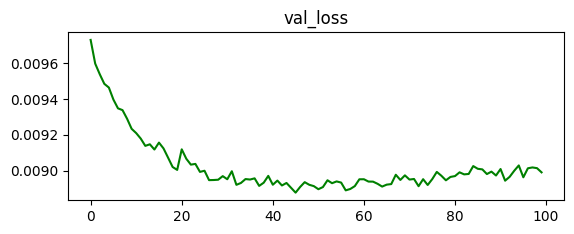

In [6]:
plt.subplot(211)
plt.title('val_loss')
plt.plot(history.history['val_loss'], color='green',
label='train')

1/1 [==============================] - 0s 81ms/step


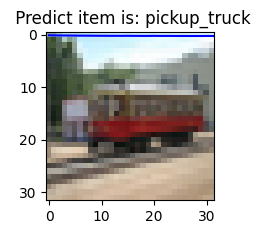

In [7]:
plt.subplot(212)
plt.title('Val Accuracy')
plt.plot(history.history['val_acc'], color='blue',
label='train')
test =12
Label = ['apple', 'aquarium_fish', 'baby', 'bear','beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 
'bridge', 'bus', 'butterfly', 'camel','can', 'castle', 'caterpillar', 'cattle', 'chair','chimpanzee', 'clock', 
'cloud', 'cockroach', 'couch','crab', 'crocodile', 'cup', 'dinosaur', 'dolphin','elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp','lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
'otter', 'palm_tree', 'pear', 'pickup_truck','pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
'skyscraper', 'snail', 'snake', 'spider', 'squirrel','streetcar', 'sunflower', 'sweet_pepper', 'table',
'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']
plt.title(" Predict item is: " +
str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,3072)))]))
plt.imshow(x_pre[test],cmap=plt.get_cmap('gray'))

In [8]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [9]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


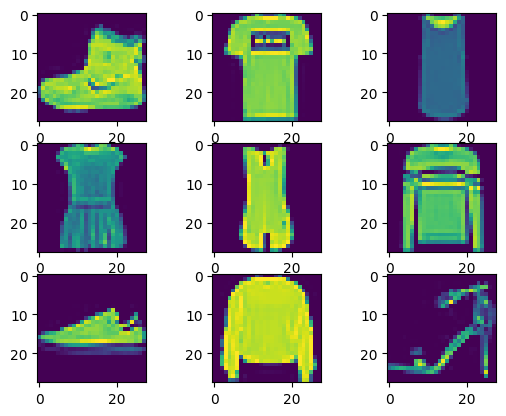

In [10]:
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(x_train[i])
plt.show()

In [11]:
x = x_test
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

In [12]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [13]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 4ms/step - loss: 0.5599 - accuracy: 0.7951 - val_loss: 0.4347 - val_accuracy: 0.8389
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3984 - accuracy: 0.8536 - val_loss: 0.4227 - val_accuracy: 0.8442
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3582 - accuracy: 0.8680 - val_loss: 0.3618 - val_accuracy: 0.8688
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3327 - accuracy: 0.8767 - val_loss: 0.3594 - val_accuracy: 0.8739
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3175 - accuracy: 0.8822 - val_loss: 0.3914 - val_accuracy: 0.8597
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3044 - accuracy: 0.8870 - val_loss: 0.3462 - val_accuracy: 0.8760
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2966 - accuracy: 0.8886 - val_loss: 0.3692 - val_accuracy: 0.8735
Epoch 

In [15]:
model.save('/content/drive/MyDrive/Colab Notebooks/FASHION_ANN.h5')

Test loss= 0.3567565381526947
Test accuracy= 0.8763999938964844


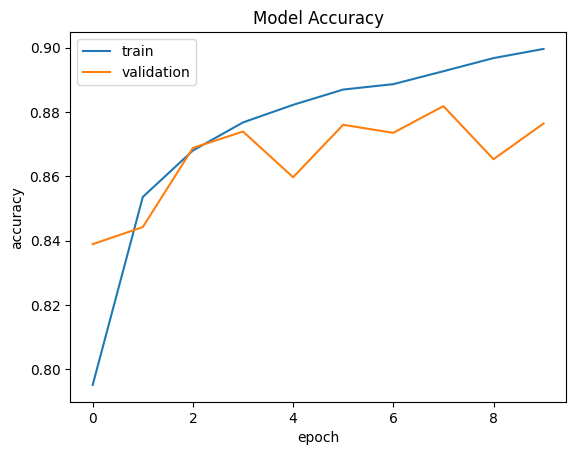

In [16]:
print('Test loss=',score[0])
print('Test accuracy=',score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

313/313 [==============================] - 1s 2ms/step


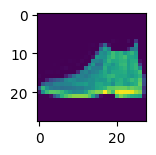

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


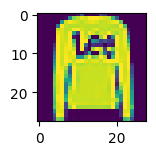

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


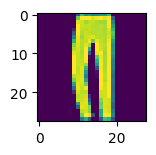

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


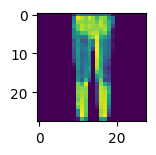

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


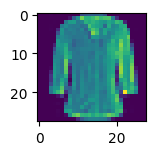

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


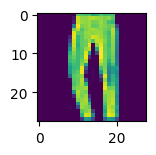

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


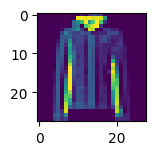

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


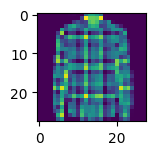

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


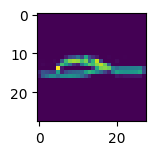

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
y_pred=model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(x[i])
  plt.show()
  print(np.round(y_pred[i]))